# Bis438 Final Project Problem 2

## Import Python Libraries

In [1]:
import numpy as np
import deepchem as dc

from MPP.model import GCN, MLP
from MPP.utils import process_prediction, make_feature, split_data

/home/veritas/anaconda3/envs/dc/lib/python3.6/site-packages/sklearn/externals/joblib/__init__.py:15: FutureWarning: sklearn.externals.joblib is deprecated in 0.21 and will be removed in 0.23. Please import this functionality directly from joblib, which can be installed with: pip install joblib. If this warning is raised when loading pickled models, you may need to re-serialize those models with scikit-learn 0.21+.
  warnings.warn(msg, category=FutureWarning)
RDKit WARNING: [11:22:07] Enabling RDKit 2019.09.2 jupyter extensions
/home/veritas/anaconda3/envs/dc/lib/python3.6/site-packages/tensorflow/python/framework/dtypes.py:516: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
/home/veritas/anaconda3/envs/dc/lib/python3.6/site-packages/tensorflow/python/framework/dtypes.py:517: FutureWarning: Passing (type, 1) or '1type' as a sy

## Build GraphConv Model

In [2]:
batch_size = 50
gcn_model = GCN(batch_size=batch_size) # build model

## Training GraphConv Model and Calculate ROC-AUC

In [3]:
# define metric as roc_auc_score
metric = dc.metrics.Metric(dc.metrics.roc_auc_score, task_averager=np.mean, verbose=False, mode='classification')

num_models = 10 # the number of iteration
roc_auc_train = list() # save roc_auc value for training dataset
roc_auc_valid = list() # save roc_auc value for validation dataset
roc_auc_test = list() # save roc_auc value for test dataset

# Do featurization
conv_feature = make_feature(data_name='BACE', feature_name='GraphConv')

for i in range(num_models):
    # Load ith dataset with GraphConv Featurizer and random split
    train_dataset, valid_dataset, test_dataset = split_data(conv_feature)
    
    # Fitting ith model with training dataset
    gcn_model.fit(train_dataset, epochs=3) # fitting with training epoch 3
    
    # Evaluating model   
    # save roc_auc for training dataset
    pred_train = gcn_model.predict(train_dataset)
    pred_train = process_prediction(y_true=train_dataset.y, y_pred=pred_train)
    train_scores = metric.compute_metric(y_true=train_dataset.y, y_pred=pred_train, w=train_dataset.w)
    roc_auc_train.append(train_scores)

    # save roc_auc for valid dataset
    pred_valid = gcn_model.predict(valid_dataset)
    pred_valid = process_prediction(y_true=valid_dataset.y, y_pred=pred_valid)
    valid_scores = metric.compute_metric(y_true=valid_dataset.y, y_pred=pred_valid, w=valid_dataset.w)
    roc_auc_valid.append(valid_scores)
   
    # save roc_auc for test dataset
    pred_test = gcn_model.predict(test_dataset)
    pred_test = process_prediction(y_true=test_dataset.y, y_pred=pred_test)
    test_scores = metric.compute_metric(y_true=test_dataset.y, y_pred=pred_test, w=test_dataset.w)
    roc_auc_test.append(test_scores)   
    
    # print roc_auc result
    print(f'\nEvaluating model number {i+1:02d}.')  # 1-based indexing of model number.
    print(f'Train ROC-AUC Score: {train_scores:.3f}, '
          f'Valid ROC-AUC Score: {valid_scores:.3f}, Test ROC-AUC Score: {test_scores:.3f}.\n')

Loading raw samples now.
shard_size: 8192
About to start loading CSV from ../data/bace.csv
Loading shard 1 of size 8192.
Featurizing sample 0
Featurizing sample 1000
TIMING: featurizing shard 0 took 2.431 s
TIMING: dataset construction took 3.019 s
Loading dataset from disk.
TIMING: dataset construction took 0.628 s
Loading dataset from disk.
TIMING: dataset construction took 0.572 s
Loading dataset from disk.
TIMING: dataset construction took 0.185 s
Loading dataset from disk.
TIMING: dataset construction took 0.270 s
Loading dataset from disk.

Instructions for updating:
Call initializer instance with the dtype argument instead of passing it to the constructor




Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where



Evaluating model number 01.
Train ROC-AUC Score: 0.513, Valid ROC-AUC Score: 0.498, Test ROC-AUC Score: 0.515.

TIMING: dataset construction took 0.490 s
Loading dataset from disk.
TIMING: dataset construction took 0.195 s
Loadi

/home/veritas/anaconda3/envs/dc/lib/python3.6/site-packages/tensorflow/python/ops/gradients_util.py:93: UserWarning: Converting sparse IndexedSlices to a dense Tensor of unknown shape. This may consume a large amount of memory.
  "Converting sparse IndexedSlices to a dense Tensor of unknown shape. "
/home/veritas/anaconda3/envs/dc/lib/python3.6/site-packages/tensorflow/python/ops/gradients_util.py:93: UserWarning: Converting sparse IndexedSlices to a dense Tensor of unknown shape. This may consume a large amount of memory.
  "Converting sparse IndexedSlices to a dense Tensor of unknown shape. "
/home/veritas/anaconda3/envs/dc/lib/python3.6/site-packages/tensorflow/python/ops/gradients_util.py:93: UserWarning: Converting sparse IndexedSlices to a dense Tensor of unknown shape. This may consume a large amount of memory.
  "Converting sparse IndexedSlices to a dense Tensor of unknown shape. "


## Calculate mean value of ROC-AUC and use std1 for error bar in GCN model

In [4]:
gcn_values = list()
gcn_values.append(np.mean(roc_auc_train))
gcn_values.append(np.mean(roc_auc_valid))
gcn_values.append(np.mean(roc_auc_test))
gcn_stds = list()
gcn_stds.append(np.std(roc_auc_train))
gcn_stds.append(np.std(roc_auc_valid))
gcn_stds.append(np.std(roc_auc_test))

## Build Multi Layer Perceptron using keras

In [5]:
batch_size = 50
dense_model = MLP(batch_size=batch_size)

## Training Multi Layer Percpetron Model and Calculate ROC-AUC

In [6]:
# define metric as roc_auc_score
metric = dc.metrics.Metric(dc.metrics.roc_auc_score, task_averager=np.mean, verbose=False, mode='classification')

num_models = 10 # the number of iteration
roc_auc_train = list() # save roc_auc value for training dataset
roc_auc_valid = list() # save roc_auc value for validation dataset
roc_auc_test = list() # save roc_auc value for test dataset

# Do featurization
ecfp_feature = make_feature(data_name='BACE', feature_name='ECFP')

for i in range(num_models):
    # Load ith dataset with GraphConv Featurizer and random split
    train_dataset, valid_dataset, test_dataset = split_data(ecfp_feature)
    
    # Fitting ith model with training dataset
    dense_model.fit(train_dataset, epochs=3) # fitting with training epoch 3
    
    # Evaluating model   
    # save roc_auc for training dataset
    pred_train = dense_model.predict(train_dataset)
    pred_train = process_prediction(y_true=train_dataset.y, y_pred=pred_train)
    train_scores = metric.compute_metric(y_true=train_dataset.y, y_pred=pred_train)
    roc_auc_train.append(train_scores)

    # save roc_auc for valid dataset
    pred_valid = dense_model.predict(valid_dataset)
    pred_valid = process_prediction(y_true=valid_dataset.y, y_pred=pred_valid)
    valid_scores = metric.compute_metric(y_true=valid_dataset.y, y_pred=pred_valid)
    roc_auc_valid.append(valid_scores)
   
    # save roc_auc for test dataset
    pred_test = dense_model.predict(test_dataset)
    pred_test = process_prediction(y_true=test_dataset.y, y_pred=pred_test)
    test_scores = metric.compute_metric(y_true=test_dataset.y, y_pred=pred_test)
    roc_auc_test.append(test_scores)   
    
    # print roc_auc result
    print(f'\nEvaluating model number {i+1:02d}.')
    print(f'Train ROC-AUC Score: {train_scores:.3f}, '
          f'Valid ROC-AUC Score: {valid_scores:.3f}, Test ROC-AUC Score: {test_scores:.3f}.\n')

Loading raw samples now.
shard_size: 8192
About to start loading CSV from ../data/bace.csv
Loading shard 1 of size 8192.
Featurizing sample 0
Featurizing sample 1000
TIMING: featurizing shard 0 took 2.075 s
TIMING: dataset construction took 2.208 s
Loading dataset from disk.
TIMING: dataset construction took 0.047 s
Loading dataset from disk.
TIMING: dataset construction took 0.042 s
Loading dataset from disk.
TIMING: dataset construction took 0.026 s
Loading dataset from disk.
TIMING: dataset construction took 0.023 s
Loading dataset from disk.

Evaluating model number 01.
Train ROC-AUC Score: 0.902, Valid ROC-AUC Score: 0.753, Test ROC-AUC Score: 0.837.

TIMING: dataset construction took 0.042 s
Loading dataset from disk.
TIMING: dataset construction took 0.020 s
Loading dataset from disk.
TIMING: dataset construction took 0.020 s
Loading dataset from disk.

Evaluating model number 02.
Train ROC-AUC Score: 0.931, Valid ROC-AUC Score: 0.925, Test ROC-AUC Score: 0.922.

TIMING: dataset

## Calculate mean value of ROC-AUC and use std1 for error bar in MLP model

In [7]:
mlp_values = list()
mlp_values.append(np.mean(roc_auc_train))
mlp_values.append(np.mean(roc_auc_valid))
mlp_values.append(np.mean(roc_auc_test))
mlp_stds = list()
mlp_stds.append(np.std(roc_auc_train))
mlp_stds.append(np.std(roc_auc_valid))
mlp_stds.append(np.std(roc_auc_test))

## Plot ROC-AUC Score

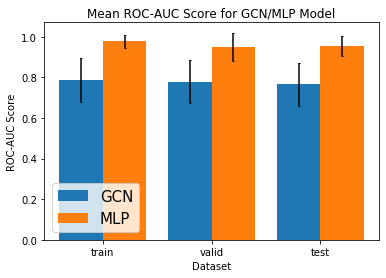

In [8]:
from matplotlib import pyplot as plt
%matplotlib inline

topics = ['train', 'valid', 'test']

def create_x(t, w, n, d):
    return [t*x + w*n for x in range(d)]

gcn_values_x = create_x(2, 0.8, 1, 3)
mlp_values_x = create_x(2, 0.8, 2, 3)

ax = plt.subplot()
p1 = ax.bar(gcn_values_x, gcn_values, yerr=gcn_stds, capsize=1)
p2 = ax.bar(mlp_values_x, mlp_values, yerr=mlp_stds, capsize=1)

middle_x = [(a+b)/2 for (a,b) in zip(gcn_values_x, mlp_values_x)]

ax.set_title('Mean ROC-AUC Score for GCN/MLP Model')
ax.set_xlabel('Dataset')
ax.set_ylabel('ROC-AUC Score')
ax.legend((p1[0], p2[0]), ('GCN', 'MLP'), fontsize=15)
ax.set_xticks(middle_x)
ax.set_xticklabels(topics)
plt.show()
